### 딥러닝 모델로 분류하기 - 이미지 데이터로
sklearn의 손글씨 데이터를 가져와 사용해보기

#### 데이터 가져오기

In [ ]:
# 데이터 가져오기, 평탄화

from sklearn import datasets, metrics

# 파일 가져오기
digits = datasets.load_digits()

# 평탄화: 2차원 배열 형태의 파일을 가로로 이어붙여 1차원 배열 형태로 변환
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print(data)  # 데이터 확인

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


#### 머신러닝 복습

In [ ]:
# 데이터 train, test 나누기

from sklearn.model_selection import train_test_split  # 데이터 분할 함수

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size: 전체 데이터 중 test에 할당할 비율

X_train


array([[ 0.,  0.,  7., ...,  0.,  0.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ..., 16., 10.,  0.],
       ...,
       [ 0.,  0.,  9., ...,  7.,  0.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  3.,  0.,  0.]])

In [ ]:
# 데이터로 머신러닝 분류 모델 학습, 평가

from sklearn.metrics import accuracy_score  # 정확도 평가 함수

# [DT 모델]
from sklearn.tree import DecisionTreeClassifier

# 모델 생성, 훈련
dt_model = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3, max_depth=3, random_state=42)
    # **max_depth=3: 트리의 최대 깊이를 3으로 제한. 깊이가 줄어든 만큼 조건을 덜 체크하므로 정확도 하락 but 과적합 감소
    # **min_samples_spilt=5: 한 노드에서 샘플이 최소 5개여야만 다음 노드로 넘어감(= 샘플을 나눔). 정확도 하락 but 과적합 감소
    # **min_samples_leaf=2: 최하단 노드(잎)는 샘플이 최소 2개 있어야 함. 샘플을 너무 작게 나누는 걸 방지해 정확도 하락 but 과적합 감소
dt_model.fit(X_train, y_train)

# 모델 예측, 평가
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"DT 테스트 정확도: {accuracy:.2f}")

# [RF 모델]
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
    # n_estimators=100: DT 모델을 100개 사용. 많으면 성능 향상 but 계산량 증가
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"RF 테스트 정확도: {accuracy:.2f}")


# [SVM 모델]
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", C=10, random_state=42)
    # C: 마진. C가 작을수록 마진이 커지고, 마진이 클수록 훈련 데이터에 맞아져 과적합 가능성 증가
    # kernel="linear": 커널 종류가 선형. 자료들을 나누는 구분선 형태를 선형/비선형(곡선 등) 등에서 하나를 선택하는 것. rbf, poly, sigmoid 등 다양함.

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM 테스트 정확도: {accuracy:.2f}")


# [LR 모델]
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', max_iter=500)
    # multi_class='ovr': 다중 분류를 할 때, 여러 다중 분류 방법 중 하나(ovr은 One-vs-Rest 방식)를 선택. 이진 분류는 True/False만 분류하고, 다중 분류는 3개 이상의 종류를 분류하는 것
    #   ovr: 여러 종류를 '현재 종류 vs 나머지 종류'식으로 여러 개의 이진 문제로 바꿈.
    #   multinomial(소프트맥스): 모든 종류에 대해 확률을 계산한 뒤, 가장 높은 확률의 종류로 예측.
    #   현재 multi_class='ovr'을 넣으면 경고가 발생해서 제거해 둠
    # max_iter: 반복 횟수
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"LR 테스트 정확도: {accuracy:.2f}")


# [KNN 모델]
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5로 설정
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN 테스트 정확도: {accuracy:.2f}")

DT 테스트 정확도: 0.41
RF 테스트 정확도: 0.85
SVM 테스트 정확도: 0.99
LR 테스트 정확도: 0.95
KNN 테스트 정확도: 0.98


#### 딥러닝 시작

In [13]:
# 원-핫 인코딩, 딥러닝 입력을 위해 Numpy로 변환, train, test 분리

import pandas as pd

X = digits.data
y = digits.target

y = pd.get_dummies(y).values # 원-핫 인코딩
    # pd.get_dummies(y): y의 각 클래스를 원-핫 벡터로 변환
    # .values: DataFrame을 Numpy 배열로 변환
print(y[:5])

# X = X.values # 딥러닝 입력을 위해 Numpy로 변환
#     # scaler = StandardScaler()
#     # X = scaler.fit_transform(X)
#     # 이 두 줄 코드에서 StandardScaler()가 X를 Numpy로 이미 변환시켰음
# print(X[:5])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

[[ True False False False False False False False False False]
 [False  True False False False False False False False False]
 [False False  True False False False False False False False]
 [False False False  True False False False False False False]
 [False False False False  True False False False False False]]


((1437, 64), (1437, 10), (360, 64), (360, 10))

손실함수

- Binary Crossentropy

이 손실 함수는 **이진 분류 문제(binary classification)에 사용**됩니다. 여기서 모델은 단 두 개의 클래스 중 하나를 예측해야 합니다. 보통 시그모이드 활성화 함수(sigmoid activation function)를 출력 계층에 사용합니다. 이 함수는 0과 1 사이의 값을 반환하여, 각 클래스에 속할 확률을 나타냅니다.

- Categorical Crossentropy

**다중 클래스 분류 문제(multi-class classification)에 사용**됩니다. 모델은 두 개 이상의 클래스 중 하나를 예측해야 합니다 소프트맥스 활성화 함수(softmax activation function)가 일반적으로 사용됩니다. 이 함수는 모든 클래스에 대해 확률 분포를 반환하여, 각 클래스에 속할 확률을 나타냅니다.

In [ ]:
# 모델 정의하기(만들기), 하이퍼파라미터 튜닝

from keras.models import Sequential # 신경망 모델: 층을 순차적으로 쌓는 방식
from keras.layers import Dense # 완전 연결 레이어
from keras.optimizers import SGD,Adam # 최적화 알고리즘
from keras.layers import Dropout
from keras.regularizers import l2 # 정규화 

# (하이퍼파라미터)튜닝
# 1. 각 레이어의 activation 함수로 relu, sigmoid, softmax 3개를 섞어 쓸 수 있음
# 2. 모델의 Dense(a, ...)의 a를 늘렸다 줄일 수도, 늘리기만 할 수도, 왔다갔다 할 수도 있음
# 3. add 함수를 여러 개 넣어서 레이어 수를 늘리거나 반대로 add 함수를 빼서 줄일 수도 있음
# * 마지막 add(레이어)는 바꾸면 안 됨! 모델마다 Last-Layer Activation과 Loss Function(compile(..., 'binary_crossentropy', ...) 이 부분)은 고정임

# 모델 수정으로 과적합 줄이는 방법(출처: chatGPT)
# 1. 모델 복잡도 줄이기: 은닉층의 수 or 한 은닉층의 노드 수를 줄여보기
# 2. 층 사이에 Dropout 추가
# 3. 특정 층에 L2 정규화 추가

# 모델 수정으로 과소적합 줄이는 방법(출처: chatGPT)
# 0. (**중요**)입력 데이터 정규화: X = scaler.fit_transform(X) 등으로 정규화해주지 않으면 딥러닝 모델이 제대로 작동하지 않음
# 1. 모델 복잡도 늘리기: 은닉층 수 or 노드 수 늘리기(64, 128까지 키워볼 것)
# 2. epochs(학습 반복수) 늘리기(100 이상 돌려볼 것)
# 3. optimizer 변경: SGD보다 Adam, RMSprop 등이 더 성능이 좋은 편
# 4. 학습률 조정
# 5. activation function(활성화 함수) 변경

model = Sequential()

# 모델에 층 추가
# model.add(Dense(32,input_shape=(64,),activation='relu', kernel_regularizer=l2(0.01)))
    # input_shape=(13,): 데이터의 특성 개수가 13개
    # Dense: 층간 모든 뉴런들이 가능한 모든 네트워크를 연결한 레이어 상태. 윗층이 2개, 아랫층이 3개면 6개의 네트워크가 다 연결된 것.
    # Dense(10, ...): 이 층이 출력으로 뽑는 노드(특성)가 10개
    # kernel_regularizer: 정규화 함수. l2는 L2 정규화
model.add(Dense(32,input_shape=(64,),activation='relu')) # 입력층
model.add(Dropout(0.1)) # 일부 뉴런을 랜덤하게 비활성화. 과적합 해소용. 0.3 = 30% 비활성화
model.add(Dense(16,activation='relu')) # 은닉층
model.add(Dense(10,activation='softmax')) # 출력층
    # 출력층 노드가 a개: a개의 답 중 하나를 분류하는 문제라는 의미
    # 손글씨 숫자 데이터는 0~9 숫자를 분류하므로 10가지
    # 만약 이진 분류라 one-hot 인코딩을 안 한 상태라면 노드가 1개여야 함

model.compile(Adam(learning_rate=0.002),'categorical_crossentropy',metrics=['accuracy'])
    # Adam(): 최적화 알고리즘. 딥러닝에서 가장 많이 쓰임.
    #   ㄴ learning_rate: 학습률. 가중치 업데이트 시 변화량 조절.
    # 'binary_crossentropy': 손실 함수 - 모델이 얼마나 틀렸는지 측정. 2중이 아닌 다중 클래스 분류라면 categorical_crossentropy를 써야 함.
    # metrics=['accuracy']: 평가 지표로 accuracy(정확도) 사용.
    
    # *learning_rate 대신 lr을 사용하면 오류: 최신 버전은 learning_rate 속성만 지원
model.summary()
    # 출력으로 나오는 Params: 파라미터. AI 모델의 내부 변수. 이 변수에 의해 입력값이 원하는 출력값으로 만들어 짐. 가중치(w)와 비슷한 것.

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,778 (10.85 KB)

 Trainable params: 2,778 (10.85 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data=(X_test,y_test))
    # validation_data: train, test와 별개로 학습 시 손실, 정확도 확인을 위해 쓰는 데이터
y_pred = model.predict(X_test)

import numpy as np

y_test_class = np.argmax(y_test,axis=1) # argmax: one-hot 인코딩으로 바뀐 상태를 되돌려서 결과를 평가할 수 있도록 함
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1222 - loss: 4.5740 - val_accuracy: 0.4750 - val_loss: 1.8394
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4473 - loss: 1.7653 - val_accuracy: 0.5861 - val_loss: 1.2610
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5784 - loss: 1.2830 - val_accuracy: 0.7750 - val_loss: 0.8160
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7333 - loss: 0.8538 - val_accuracy: 0.8694 - val_loss: 0.5185
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8026 - loss: 0.6146 - val_accuracy: 0.9139 - val_loss: 0.3643
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8630 - loss: 0.4152 - val_accuracy: 0.9250 - val_loss: 0.3050
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9019 - loss: 0.3373 - val_accuracy: 0.9389 - val_loss: 0.2408
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9001 - loss: 0.3270 - val_accuracy: 0.9333 - val_loss

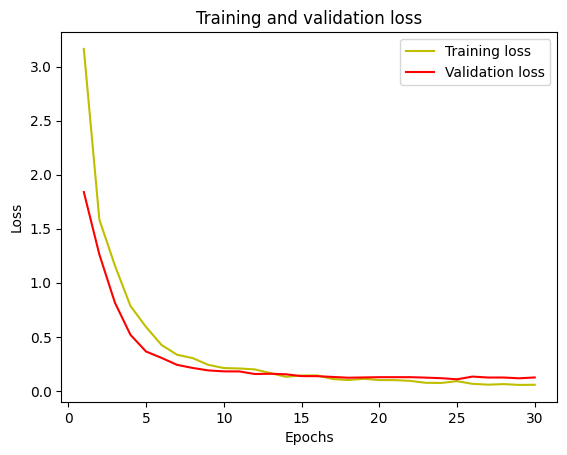

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

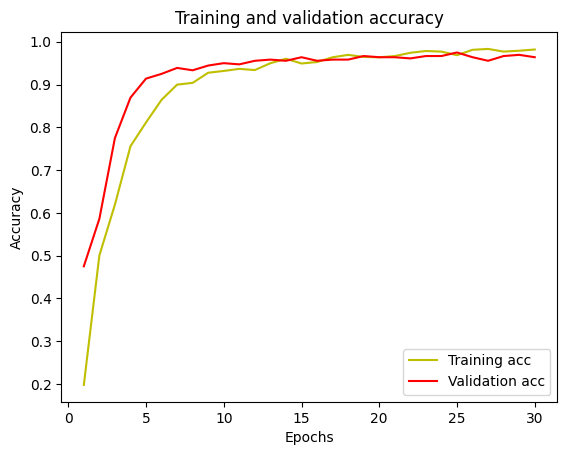

In [62]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.90      1.00      0.95        28
           2       1.00      0.97      0.98        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.94      0.97      0.96        34
           8       0.93      0.87      0.90        30
           9       0.93      0.95      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

[[32  0  0  0  0  0  0  1  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  1  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0